### 根據「KiTS19訓練集」CT影像中腎臟區域HU值的分布，找出腎臟區域最適合的窗寬和窗位

In [1]:
import numpy as np
import nibabel as nib
import time
import os
from os.path import join

In [2]:
dataset_path = 'kits'

In [3]:
st = time.time()

print('程式開始執行...')

case_num = 210

hu_roi_train = []

case_name_list = []

for f in os.listdir(dataset_path):
    if 'case_' in f:
        case_name_list.append(f)

for idx, f in enumerate(case_name_list):
    if idx < case_num :
        if (idx + 1) % 10 == 0:
            print(f'目前進度：{idx + 1} / {case_num}')
        img = nib.load(join(dataset_path, f, 'imaging.nii')).get_fdata()
        img = img.astype('float32')
        img = img.flatten()

        seg = nib.load(join(dataset_path, f, 'segmentation.nii')).get_fdata()
        seg = seg.astype('uint8')
        seg = seg.flatten()
        
        hu_roi_train += list(img[(seg == 1) | (seg == 2)])
        
ed = time.time()

sp_time = ed - st
print(f'花費時間：{sp_time: .4f}')

程式開始執行...
目前進度：10 / 210
目前進度：20 / 210
目前進度：30 / 210
目前進度：40 / 210
目前進度：50 / 210
目前進度：60 / 210
目前進度：70 / 210
目前進度：80 / 210
目前進度：90 / 210
目前進度：100 / 210
目前進度：110 / 210
目前進度：120 / 210
目前進度：130 / 210
目前進度：140 / 210
目前進度：150 / 210
目前進度：160 / 210
目前進度：170 / 210
目前進度：180 / 210
目前進度：190 / 210
目前進度：200 / 210
目前進度：210 / 210
花費時間： 854.5638


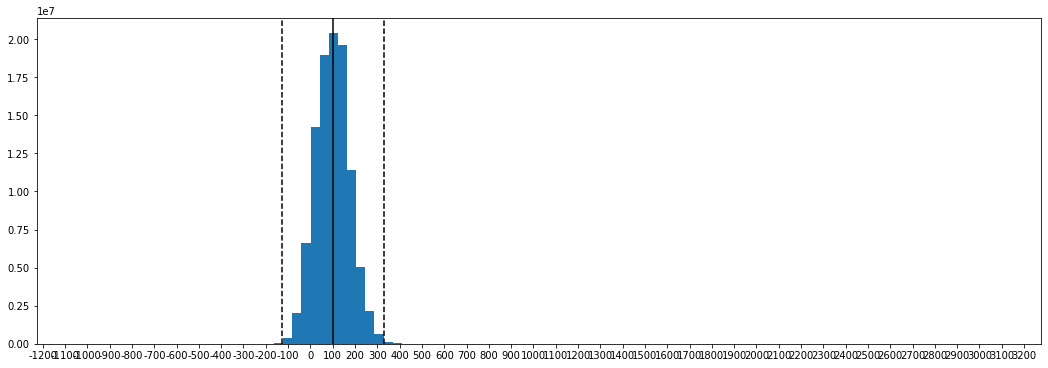

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(18, 6))
plt.rcParams['axes.unicode_minus'] = False #用來正常顯示負號
axs = plt.axes()
axs.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.hist(hu_roi_train, bins = 100)

plt.axvline(x=np.mean(hu_roi_train), color='k')
plt.axvline(x=np.mean(hu_roi_train) + 3 * np.std(hu_roi_train), color='k', linestyle='--')
plt.axvline(x=np.mean(hu_roi_train) - 3 * np.std(hu_roi_train), color='k', linestyle='--')

plt.show()

### 根據「KiTS19訓練集」CT影像中腎臟腫瘤區域HU值的分布，找出腎臟腫瘤區域最適合的窗寬和窗位

In [6]:
dataset_path = 'kits'

In [7]:
st = time.time()

print('程式開始執行...')

case_num = 210

hu_roi_train = []

case_name_list = []

for f in os.listdir(dataset_path):
    if 'case_' in f:
        case_name_list.append(f)

for idx, f in enumerate(case_name_list):
    if idx < case_num :
        if (idx + 1) % 10 == 0:
            print(f'目前進度：{idx + 1} / {case_num}')
        img = nib.load(join(dataset_path, f, 'imaging.nii')).get_fdata()
        img = img.astype('float32')
        img = img.flatten()

        seg = nib.load(join(dataset_path, f, 'segmentation.nii')).get_fdata()
        seg = seg.astype('uint8')
        seg = seg.flatten()
        
        hu_roi_train += list(img[seg == 2])
        
ed = time.time()

sp_time = ed - st
print(f'花費時間：{sp_time: .4f}')

程式開始執行...
目前進度：10 / 210
目前進度：20 / 210
目前進度：30 / 210
目前進度：40 / 210
目前進度：50 / 210
目前進度：60 / 210
目前進度：70 / 210
目前進度：80 / 210
目前進度：90 / 210
目前進度：100 / 210
目前進度：110 / 210
目前進度：120 / 210
目前進度：130 / 210
目前進度：140 / 210
目前進度：150 / 210
目前進度：160 / 210
目前進度：170 / 210
目前進度：180 / 210
目前進度：190 / 210
目前進度：200 / 210
目前進度：210 / 210
花費時間： 1077.3027


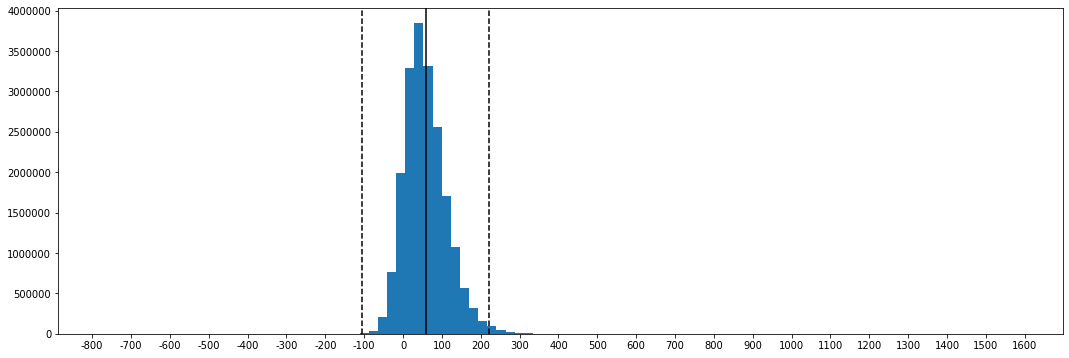

In [8]:
plt.figure(figsize=(18, 6))
plt.rcParams['axes.unicode_minus'] = False #用來正常顯示負號
axs = plt.axes()
axs.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.hist(hu_roi_train, bins = 100)

plt.axvline(x=np.mean(hu_roi_train), color='k')
plt.axvline(x=np.mean(hu_roi_train) + 3 * np.std(hu_roi_train), color='k', linestyle='--')
plt.axvline(x=np.mean(hu_roi_train) - 3 * np.std(hu_roi_train), color='k', linestyle='--')

plt.show()

In [2]:
gt = np.asarray([0,0,0,0,0])
pd = np.asarray([0,0,0,0,0])

In [3]:
roi_gt = np.greater(gt, 0)
roi_pd = np.greater(pd, 0)

In [4]:
roi_gt

array([False, False, False, False, False])

In [5]:
np.logical_and(roi_gt, roi_pd)

array([False, False, False, False, False])

In [6]:
np.logical_and(roi_gt, roi_pd).sum()

0

In [7]:
np.logical_and(roi_gt, roi_pd).sum() / roi_gt.sum()

C:\Users\oplabRTX2070S\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

In [10]:
np.logical_and(roi_gt, roi_pd).sum()

0

In [9]:
 roi_gt.sum()

0